In [1]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tree_detection_framework.detection.SAM2_detector import SAMV2Detector
from tree_detection_framework.utils.benchmarking import (
    get_benchmark_detections,
    evaluate_detections,
)
from tree_detection_framework.constants import DATA_FOLDER

/ofo-share/repos-amritha/conda/envs/sam-tdf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/ofo-share/repos-amritha/conda/envs/sam-tdf/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.2'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
RGB_DIR = [
    Path(DATA_FOLDER, "detectree2-test-tiles", "tiles", "Danum"),
    Path(DATA_FOLDER, "detectree2-test-tiles", "tiles", "SepilokEast"),
    Path(DATA_FOLDER, "detectree2-test-tiles", "tiles", "SepilokWest"),
]

ANN_DIR = [
    Path(DATA_FOLDER, "detectree2-test-tiles", "annotations", "Danum"),
    Path(DATA_FOLDER, "detectree2-test-tiles", "annotations", "SepilokEast"),
    Path(DATA_FOLDER, "detectree2-test-tiles", "annotations", "SepilokWest"),
]

DATASET_NAME = "detectree2"
NMS_THRESHOLD = 0.05
CONFIDENCE_THRESHOLD = 0.1

detector = SAMV2Detector()

INFO:root:Loaded checkpoint sucessfully


In [ ]:
# Load NEON and get detections
mappings = get_benchmark_detections(
    dataset_name=DATASET_NAME,
    images_dir=RGB_DIR,
    annotations_dir=ANN_DIR,
    detectors={"sam2": detector},
    nms_threshold=NMS_THRESHOLD,
    min_confidence=CONFIDENCE_THRESHOLD,
    nms_on_polygons=True,
)

In [6]:
evaluate_detections(mappings)

INFO:root:Detectors to be evaluated: ['sam2']


'sam2': Precision=0.15646283734491523, Recall=0.6535552947843976, F1-Score=0.25248105376346025


Visualizing the predictions
--

In [5]:
def create_plot_with_preds(img, gt_boxes):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    ax.imshow(img)
    for bbox in gt_boxes:
        xmin, ymin, xmax, ymax = bbox.bounds
        # Create a Rectangle patch (xy, width, height)
        width = xmax - xmin
        height = ymax - ymin
        rect = patches.Rectangle(
            (xmin, ymin), width, height, linewidth=1, edgecolor="b", facecolor="none"
        )
        # Add the patch to the Axes
        ax.add_patch(rect)
    return ax

<Axes: >

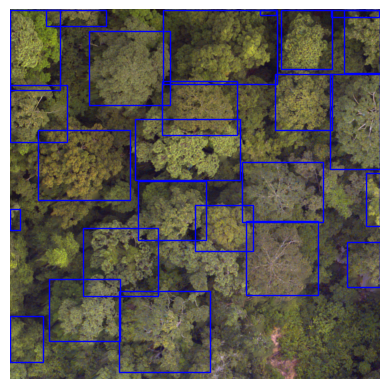

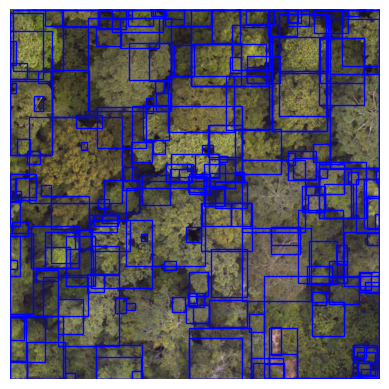

In [6]:
example_img = list(mappings.keys())[13]
img = cv2.imread(example_img, cv2.IMREAD_COLOR_RGB)
create_plot_with_preds(img, mappings[example_img]["gt"])
create_plot_with_preds(img, mappings[example_img]["sam2"])

<Axes: >

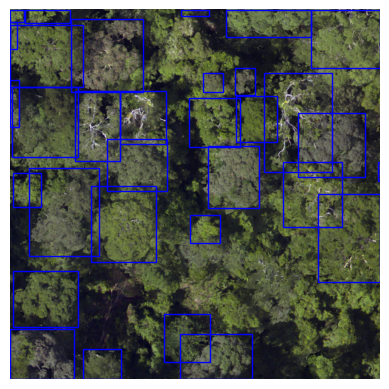

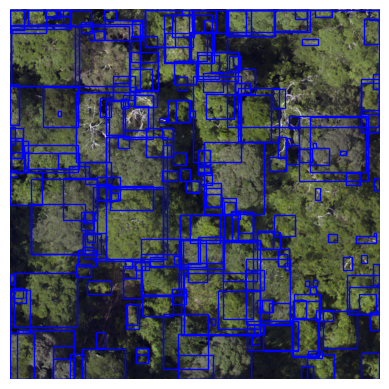

In [7]:
example_img = list(mappings.keys())[7]
img = cv2.imread(example_img, cv2.IMREAD_COLOR_RGB)
create_plot_with_preds(img, mappings[example_img]["gt"])
create_plot_with_preds(img, mappings[example_img]["sam2"])